In [ ]:
import pandas as pd
df = pd.read_csv('/content/dataset.csv')
df.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Prevalence,Central Asia,Both,All ages,Bipolar disorder,Number,1990,322785.887918,409839.771555,247409.758039
1,Prevalence,Central Asia,Both,All ages,Bipolar disorder,Percent,1990,0.004914,0.006247,0.003758
2,Prevalence,Central Asia,Both,All ages,Bipolar disorder,Rate,1990,466.007696,591.687849,357.186778
3,Prevalence,Central Asia,Both,All ages,Bipolar disorder,Number,1991,326533.221993,413913.850445,250319.136582
4,Prevalence,Central Asia,Both,All ages,Bipolar disorder,Percent,1991,0.004915,0.006237,0.003754


In [ ]:
df1 = df[~df['metric'].isin(['Number', 'Rate'])]
df1['val'] = df1['val'] * 100
df1['upper'] = df1['upper'] * 100
df1['lower'] = df1['lower'] * 100
df1.columns = (df1.columns
                      .str.lower()
                      .str.replace('(', '')
                      .str.replace(')', '')
                      .str.strip()
                      .str.replace(' ','_'))
df1.head()


<ipython-input-2-a8cf441b8d72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['val'] = df1['val'] * 100
<ipython-input-2-a8cf441b8d72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['upper'] = df1['upper'] * 100
<ipython-input-2-a8cf441b8d72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,measure,location,sex,age,cause,metric,year,val,upper,lower
1,Prevalence,Central Asia,Both,All ages,Bipolar disorder,Percent,1990,0.491352,0.624703,0.375794
4,Prevalence,Central Asia,Both,All ages,Bipolar disorder,Percent,1991,0.491464,0.623661,0.375405
7,Prevalence,Central Asia,Both,All ages,Bipolar disorder,Percent,1992,0.491862,0.623428,0.375766
10,Prevalence,Central Asia,Both,All ages,Bipolar disorder,Percent,1993,0.492494,0.623542,0.376816
13,Prevalence,Central Asia,Both,All ages,Bipolar disorder,Percent,1994,0.493570,0.625474,0.377986


In [ ]:
data = df1[['location', 'cause','year', 'val', 'upper', 'lower']]
data.head()

,location,cause,year,val,upper,lower
1,Central Asia,Bipolar disorder,1990,0.491352,0.624703,0.375794
4,Central Asia,Bipolar disorder,1991,0.491464,0.623661,0.375405
7,Central Asia,Bipolar disorder,1992,0.491862,0.623428,0.375766
10,Central Asia,Bipolar disorder,1993,0.492494,0.623542,0.376816
13,Central Asia,Bipolar disorder,1994,0.493570,0.625474,0.377986


In [ ]:
unique_causes = data['cause'].unique()
print(unique_causes)


['Bipolar disorder' 'Autism spectrum disorders' 'Eating disorders'
 'Idiopathic developmental intellectual disability' 'Anxiety disorders'
 'Attention-deficit/hyperactivity disorder' 'Conduct disorder'
 'Other mental disorders' 'Schizophrenia' 'Depressive disorders']


In [ ]:
data.loc[data['location'] == 'Latin America & Caribbean - WB', 'location'] = 'Latin America & Caribbean'


In [ ]:
unique_locations = data['location'].unique()
disorder = data['cause'].unique()
for cause in disorder:
  print(cause)
for location in unique_locations:
  print(location)

Bipolar disorder
Autism spectrum disorders
Eating disorders
Idiopathic developmental intellectual disability
Anxiety disorders
Attention-deficit/hyperactivity disorder
Conduct disorder
Other mental disorders
Schizophrenia
Depressive disorders
Central Asia
Southeast Asia
Central Europe
Oceania
Eastern Europe
East Asia
High-income North America
Australasia
High-income Asia Pacific
North Africa and Middle East
Europe & Central Asia - WB
Eastern Mediterranean Region
Western Pacific Region
Western Europe
European Region
South-East Asia Region
Region of the Americas
World Bank Low Income
World Bank Lower Middle Income
World Bank Upper Middle Income
African Region
World Bank High Income
Caribbean
Tropical Latin America
Central Latin America
Southern Sub-Saharan Africa
East Asia & Pacific - WB
Southern Latin America
Andean Latin America
Latin America & Caribbean
South Asia - WB
Middle East & North Africa - WB
Central Sub-Saharan Africa
Europe
Asia
North America
South Asia
Commonwealth Middle I

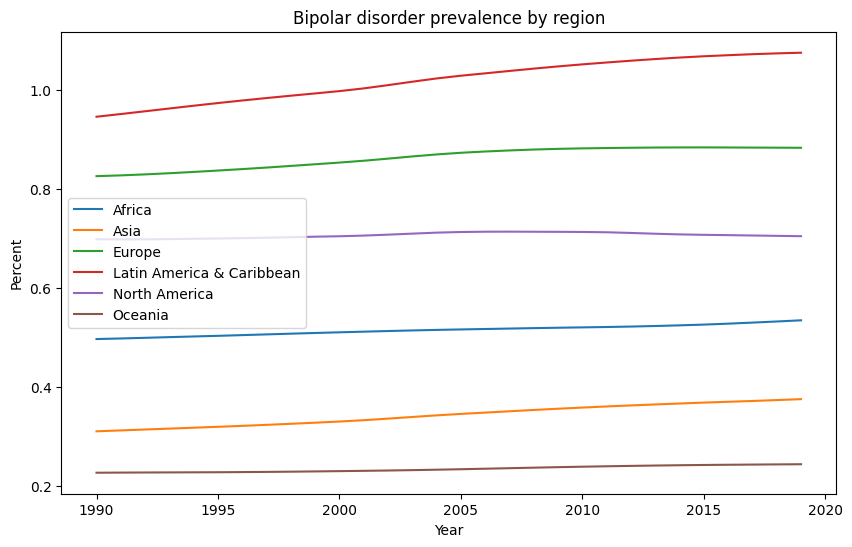

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

locations = ['Oceania', 'Latin America & Caribbean', 'Europe', 'North America', 'Asia', 'Africa']
cause = 'Bipolar disorder'
filtered_df = data.loc[(data['location'].isin(locations)) & (data['cause'] == cause)]

# Create a pivot table to summarize the data by year and location
summary_df = pd.pivot_table(filtered_df, values='val', index='year', columns='location', aggfunc='sum')

# Create a line plot to show the trend in the data over time
plt.figure(figsize=(10, 6))
for col in summary_df.columns:
    plt.plot(summary_df.index, summary_df[col], label=col)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title(f'{cause} prevalence by region')
plt.legend(loc='best')
plt.show()



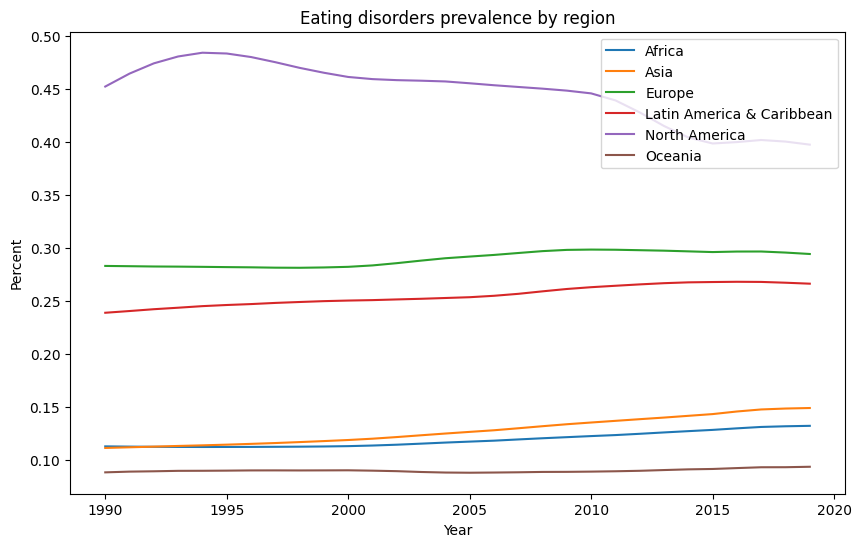

In [ ]:
locations = ['Oceania', 'Latin America & Caribbean', 'Europe', 'North America', 'Asia', 'Africa']
cause = 'Eating disorders'
filtered_df = data.loc[(data['location'].isin(locations)) & (data['cause'] == cause)]

# Create a pivot table to summarize the data by year and location
summary_df = pd.pivot_table(filtered_df, values='val', index='year', columns='location', aggfunc='sum')

# Create a line plot to show the trend in the data over time
plt.figure(figsize=(10, 6))
for col in summary_df.columns:
    plt.plot(summary_df.index, summary_df[col], label=col)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title(f'{cause} prevalence by region')
plt.legend(loc='best')
plt.show()

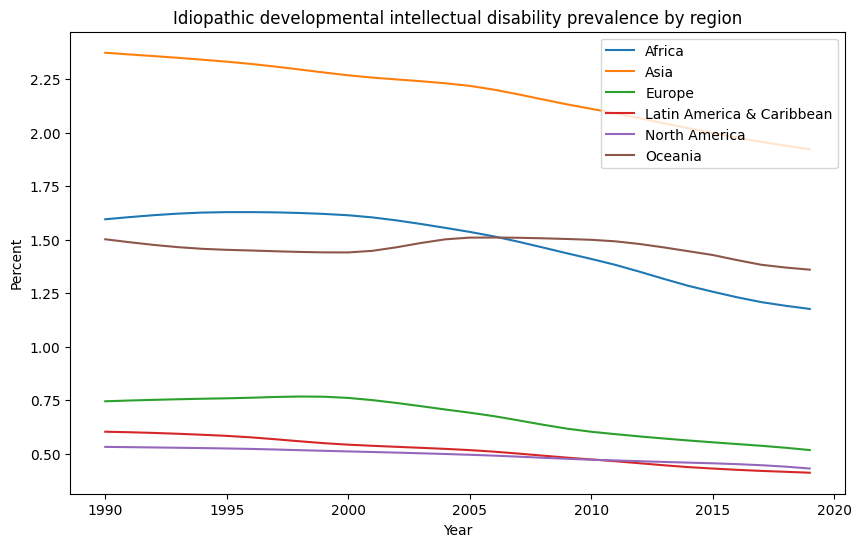

In [ ]:
locations = ['Oceania', 'Latin America & Caribbean', 'Europe', 'North America', 'Asia', 'Africa']
cause = 'Idiopathic developmental intellectual disability'
filtered_df = data.loc[(data['location'].isin(locations)) & (data['cause'] == cause)]

# Create a pivot table to summarize the data by year and location
summary_df = pd.pivot_table(filtered_df, values='val', index='year', columns='location', aggfunc='sum')

# Create a line plot to show the trend in the data over time
plt.figure(figsize=(10, 6))
for col in summary_df.columns:
    plt.plot(summary_df.index, summary_df[col], label=col)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title(f'{cause} prevalence by region')
plt.legend(loc='best')
plt.show()

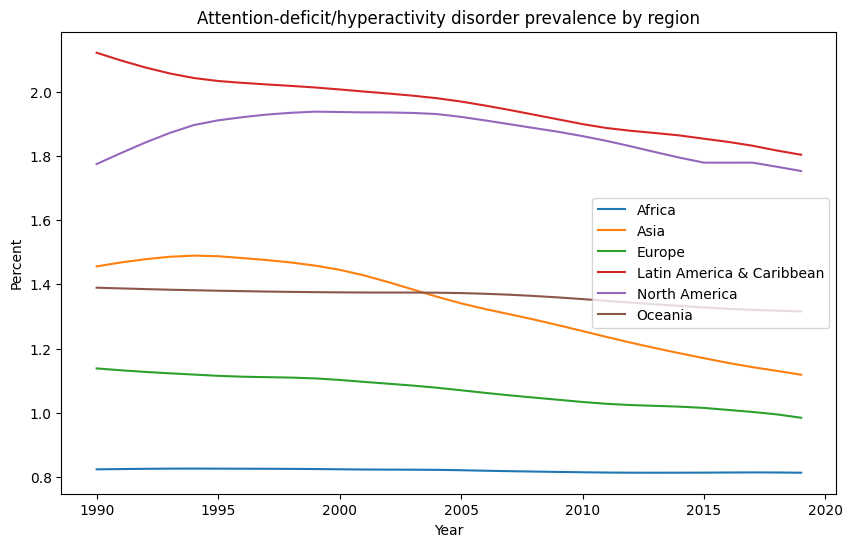

In [ ]:
locations = ['Oceania', 'Latin America & Caribbean', 'Europe', 'North America', 'Asia', 'Africa']
cause = 'Attention-deficit/hyperactivity disorder'
filtered_df = data.loc[(data['location'].isin(locations)) & (data['cause'] == cause)]

# Create a pivot table to summarize the data by year and location
summary_df = pd.pivot_table(filtered_df, values='val', index='year', columns='location', aggfunc='sum')

# Create a line plot to show the trend in the data over time
plt.figure(figsize=(10, 6))
for col in summary_df.columns:
    plt.plot(summary_df.index, summary_df[col], label=col)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title(f'{cause} prevalence by region')
plt.legend(loc='best')
plt.show()

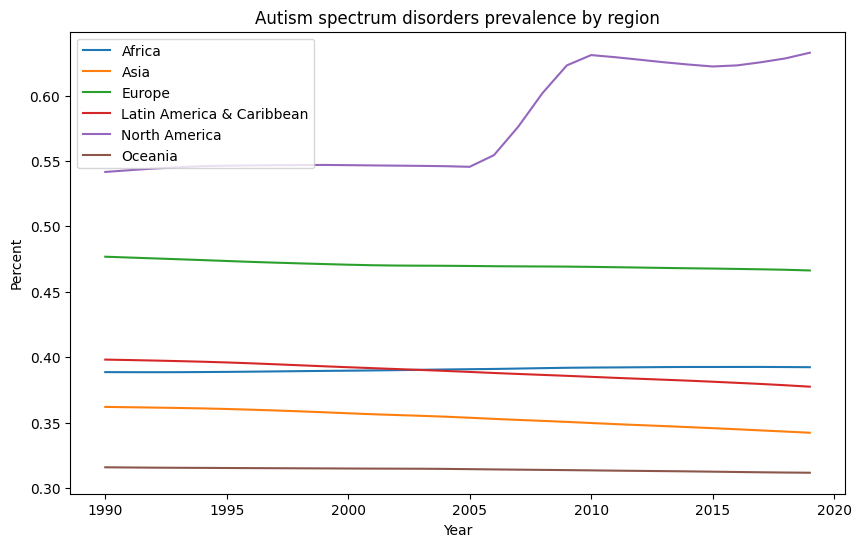

In [ ]:
locations = ['Oceania', 'Latin America & Caribbean', 'Europe', 'North America', 'Asia', 'Africa']
cause = 'Autism spectrum disorders'
filtered_df = data.loc[(data['location'].isin(locations)) & (data['cause'] == cause)]

# create a pivot table to summarize the data by year and location
summary_df = pd.pivot_table(filtered_df, values='val', index='year', columns='location', aggfunc='sum')

# create a line plot to show the trend in the data over time
plt.figure(figsize=(10, 6))
for col in summary_df.columns:
    plt.plot(summary_df.index, summary_df[col], label=col)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title(f'{cause} prevalence by region')
plt.legend(loc='best')
plt.show()

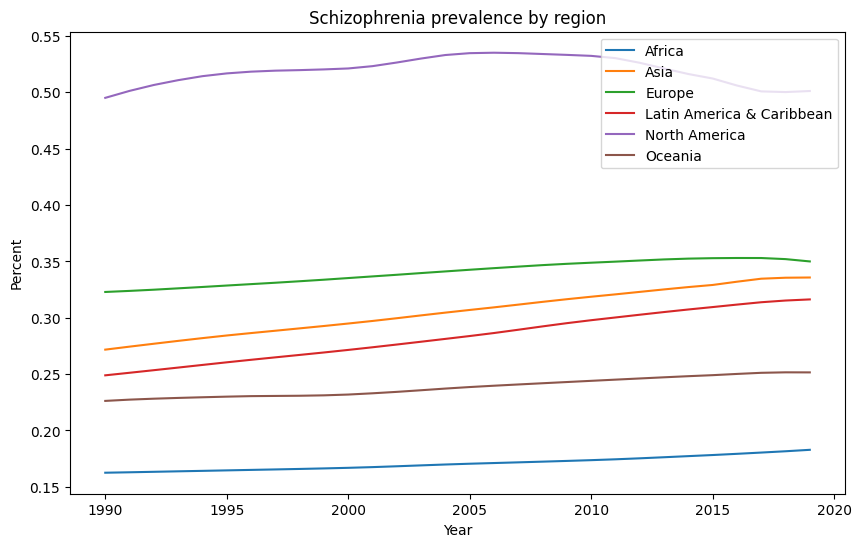

In [ ]:
locations = ['Oceania', 'Latin America & Caribbean', 'Europe', 'North America', 'Asia', 'Africa']
cause = 'Schizophrenia'
filtered_df = data.loc[(data['location'].isin(locations)) & (data['cause'] == cause)]

# create a pivot table to summarize the data by year and location
summary_df = pd.pivot_table(filtered_df, values='val', index='year', columns='location', aggfunc='sum')

# create a line plot to show the trend in the data over time
plt.figure(figsize=(10, 6))
for col in summary_df.columns:
    plt.plot(summary_df.index, summary_df[col], label=col)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title(f'{cause} prevalence by region')
plt.legend(loc='best')
plt.show()

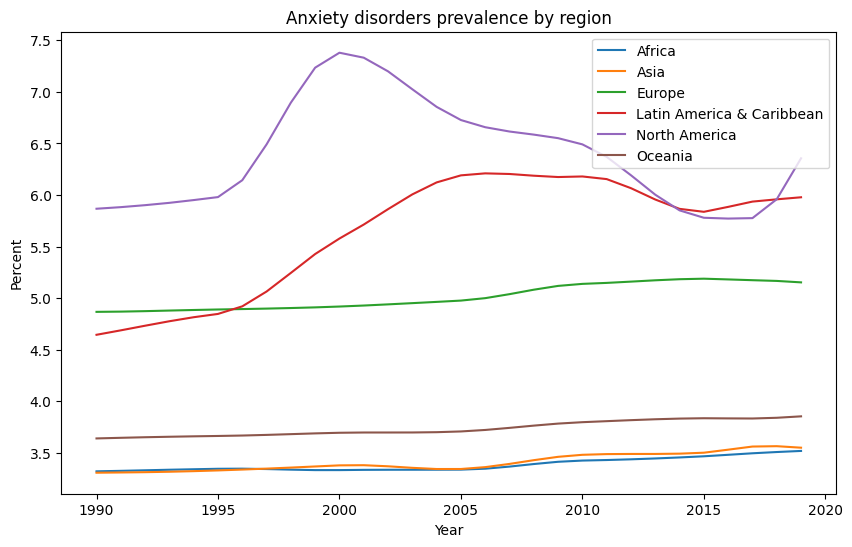

In [ ]:
locations = ['Oceania', 'Latin America & Caribbean', 'Europe', 'North America', 'Asia', 'Africa']
cause = 'Anxiety disorders'
filtered_df = data.loc[(data['location'].isin(locations)) & (data['cause'] == cause)]

# create a pivot table to summarize the data by year and location
summary_df = pd.pivot_table(filtered_df, values='val', index='year', columns='location', aggfunc='sum')

# create a line plot to show the trend in the data over time
plt.figure(figsize=(10, 6))
for col in summary_df.columns:
    plt.plot(summary_df.index, summary_df[col], label=col)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title(f'{cause} prevalence by region')
plt.legend(loc='best')
plt.show()

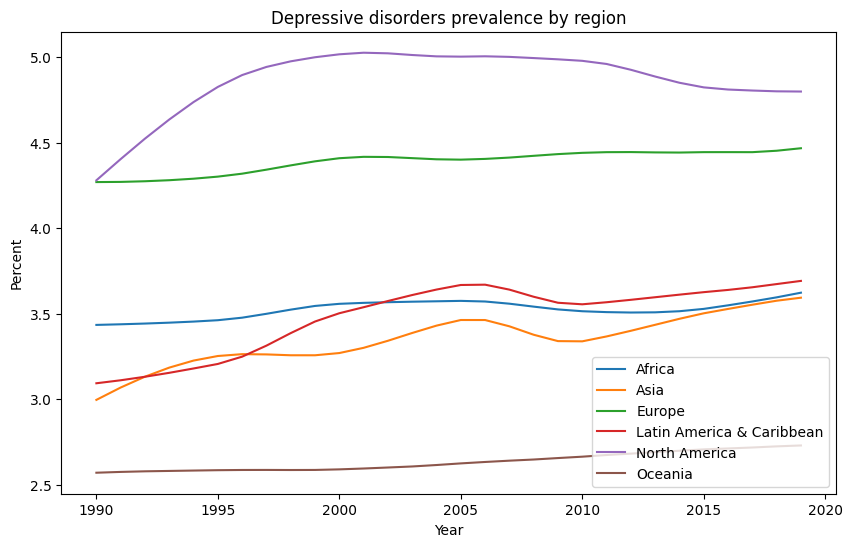

In [ ]:
locations = ['Oceania', 'Latin America & Caribbean', 'Europe', 'North America', 'Asia', 'Africa']
cause = 'Depressive disorders'
filtered_df = data.loc[(data['location'].isin(locations)) & (data['cause'] == cause)]

# create a pivot table to summarize the data by year and location
summary_df = pd.pivot_table(filtered_df, values='val', index='year', columns='location', aggfunc='sum')

# create a line plot to show the trend in the data over time
plt.figure(figsize=(10, 6))
for col in summary_df.columns:
    plt.plot(summary_df.index, summary_df[col], label=col)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title(f'{cause} prevalence by region')
plt.legend(loc='best')
plt.show()